In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rc("font", family="Arial")
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from pylab import *

import numpy as np
import pyemma
import pytraj as pt
import mdtraj as md

import pickle
import seaborn as sns
from itertools import product
from pandas import DataFrame

from itertools import cycle
import pandas as pd
from os.path import join
from collections import OrderedDict

from pyemma.util.contexts import settings
from glob import glob

## Loading data

In [2]:
rf0=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot0.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot0.parm7')

rf1=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot1.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot1.parm7')

rf2=pt.load('../1-Trajectories/0-Parm_rst//closed6_dry_rot2.rst7',
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot2.parm7')

rf3=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot3.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot3.parm7')

rf4=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot4.rst7',
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot4.parm7')

rf5=pt.load('../1-Trajectories/0-Parm_rst/closed6_dry_rot5.rst7', 
            '../1-Trajectories/0-Parm_rst/closed6_dry_rot5.parm7')

rfopen=pt.load('../1-Trajectories/0-Parm_rst/open10_dry.rst7',
               '../1-Trajectories/0-Parm_rst/open10_dry.parm7')

### MSM & PCCA without IPA

In [6]:
indir = '../1-Trajectories/1-NoEq_without_IPA'
topfile = '../1-Trajectories/0-Parm_rst/open10_dry.parm7'
traj_list = sorted(glob(indir+'/*.nc'))

In [3]:
with open('./pickled/2-Without_IPA/1_Y.pickle', 'rb') as inf:
    Y = pickle.load(inf)
Y_concat= np.concatenate(Y)

with open('./pickled/2-Without_IPA/1_cluster.pickle', 'rb') as inf:
    cluster = pickle.load(inf)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)

with open('./pickled/2-Without_IPA/1_msm.pickle', 'rb') as inf:
    msm = pickle.load(inf)
    
nstates=6
msm.pcca(nstates)
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

### MSM & PCCA with IPA

In [7]:
indir1 = '../1-Trajectories/2-NoEq_with_IPA'
indir2 = '../1-Trajectories/4-Adaptive_sampling_with_IPA'
topfile = '../1-Trajectories/0-Parm_rst/open10_dry.parm7'

traj_list1 = sorted(glob(indir1+'/*.nc'))
traj_list2 = sorted(glob(indir2+'/*.nc'))

traj_list_ipa=traj_list1+traj_list2

In [4]:
with open('./pickled/1-With_IPA/1_Y.pickle', 'rb') as inf:
    Y_ipa = pickle.load(inf)
Y_concat_ipa= np.concatenate(Y_ipa)

with open('./pickled/1-With_IPA/1_cluster.pickle', 'rb') as inf:
    cluster_ipa = pickle.load(inf)
dtrajs_concatenated_ipa = np.concatenate(cluster_ipa.dtrajs)

with open('./pickled/1-With_IPA/1_msm.pickle', 'rb') as inf:
    msm_ipa = pickle.load(inf)
    
nstates_ipa=5
msm_ipa.pcca(nstates_ipa)
metastable_traj_ipa = msm_ipa.metastable_assignments[dtrajs_concatenated_ipa]

## Save sample as single pdbs with multiple models

In [16]:
pcca_samples = msm.sample_by_distributions(msm.metastable_distributions, 10000)

In [17]:
pcca_samples_ipa = msm_ipa.sample_by_distributions(msm_ipa.metastable_distributions, 10000)

In [18]:
traj_source = pyemma.coordinates.source(traj_list, top=topfile, stride=1)
pyemma.coordinates.save_trajs(
    traj_source,
    pcca_samples,
    outfiles=['./NMR/2-Without_IPA/pcca{}_samples.xtc'.format(n + 1)
              for n in range(msm.n_metastable)])

['./NMR/2-Without_IPA/pcca1_samples.xtc',
 './NMR/2-Without_IPA/pcca2_samples.xtc',
 './NMR/2-Without_IPA/pcca3_samples.xtc',
 './NMR/2-Without_IPA/pcca4_samples.xtc',
 './NMR/2-Without_IPA/pcca5_samples.xtc',
 './NMR/2-Without_IPA/pcca6_samples.xtc']

In [19]:
traj_source_ipa = pyemma.coordinates.source(traj_list_ipa, top=topfile, stride=1)
pyemma.coordinates.save_trajs(
    traj_source_ipa,
    pcca_samples_ipa,
    outfiles=['./NMR/1-With_IPA/pcca{}_samples.xtc'.format(n + 1)
              for n in range(msm_ipa.n_metastable)])

['./NMR/1-With_IPA/pcca1_samples.xtc',
 './NMR/1-With_IPA/pcca2_samples.xtc',
 './NMR/1-With_IPA/pcca3_samples.xtc',
 './NMR/1-With_IPA/pcca4_samples.xtc',
 './NMR/1-With_IPA/pcca5_samples.xtc']

In [21]:
indir_sample = './NMR/2-Without_IPA'
traj_list_sample = sorted(glob(indir_sample+'/*.xtc'))
for t in traj_list_sample:
    traj=pt.load(t, topfile, stride=1)
    pt.write_traj("./NMR/2-Without_IPA/pcca{}_samples.pdb".format(t[-13]), 
                  traj, overwrite=True, options='model')

In [22]:
indir_sample_ipa = './NMR/1-With_IPA'
traj_list_sample_ipa = sorted(glob(indir_sample_ipa+'/*.xtc'))
for t in traj_list_sample_ipa:
    traj=pt.load(t, topfile, stride=1)
    pt.write_traj("./NMR/1-With_IPA/pcca{}_samples.pdb".format(t[-13]), 
                  traj, overwrite=True, options='model')

## Run Shiftx2

```
python ~/Software/shiftx2-linux/shiftx2.py -b '*.pdb' -r -p 7.4 -t 298
```

## Parse output

In [27]:
clust_num=[]
res_num=[]
CB=[]
HB1=[]
HB2=[]
HB3=[]

resid=[14,46,78,110,142,174]

files_ipa = sorted(glob("./NMR/1-With_IPA/*.pdb.cs"))
print(files_ipa)

for f in files_ipa:
    inputfile = open(f, 'r')
    
    for line in inputfile:
        for res in resid:
            if "{},A,CB".format(res) in line:
                line = line.strip()
                lineSplit = line.split(",")
                CB.append(lineSplit[3])
                clust_num.append(f[-16])
                res_num.append(res)

            if "{},A,HB,".format(res) in line:
                line = line.strip()
                lineSplit = line.split(",")
                HB1.append(lineSplit[3])         

            if "{},A,HB2".format(res) in line:
                line = line.strip()
                lineSplit = line.split(",")
                HB2.append(lineSplit[3])  

            if "{},A,HB3".format(res) in line:
                line = line.strip()
                lineSplit = line.split(",")
                HB3.append(lineSplit[3])


df_tmp0=pd.Series(clust_num).astype(int)
df_tmp1=pd.Series(res_num).astype(int)
df_tmp2=pd.Series(CB).astype(float)
df_tmp3=pd.Series(HB1).astype(float)
df_tmp4=pd.Series(HB2).astype(float)
df_tmp5=pd.Series(HB3).astype(float)

all_dfs = [df_tmp0,df_tmp1, df_tmp2, df_tmp3, df_tmp4, df_tmp5]

df_ipa = pd.concat(all_dfs, axis=1)
 
df_ipa.columns = ['Cluster', 'Residue', 'CB', 'HB1', 'HB2', 'HB3']

df_ipa["HB_avg"]=df_ipa.loc[: , "HB1":"HB3"].mean(axis=1)

df_ipa

['./NMR/1-With_IPA/pcca1_samples.pdb.cs', './NMR/1-With_IPA/pcca2_samples.pdb.cs', './NMR/1-With_IPA/pcca3_samples.pdb.cs', './NMR/1-With_IPA/pcca4_samples.pdb.cs', './NMR/1-With_IPA/pcca5_samples.pdb.cs']


,Cluster,Residue,CB,HB1,HB2,HB3,HB_avg
0,1,14,18.6929,1.3287,1.8493,1.5587,1.578900
1,1,46,19.4224,1.3540,1.7701,1.5349,1.553000
2,1,78,19.4124,1.3602,1.7789,1.5255,1.554867
3,1,110,19.3791,1.4001,1.7839,1.5255,1.569833
4,1,142,19.4689,1.4234,1.7789,1.5255,1.575933
5,1,174,19.3474,1.3880,1.7836,1.5255,1.565700
6,2,14,18.5546,1.3983,1.7521,1.4754,1.541933
7,2,46,19.3733,1.4308,1.7312,1.4846,1.548867
8,2,78,19.3358,1.3596,1.8003,1.5031,1.554333
9,2,110,19.3113,1.3754,1.7959,1.4921,1.554467


In [28]:
clust_num_noipa=[]
res_num_noipa=[]
CB_noipa=[]
HB1_noipa=[]
HB2_noipa=[]
HB3_noipa=[]

resid_noipa=[14,46,78,110,142,174]

files_noipa = sorted(glob("./NMR/2-Without_IPA/*.pdb.cs"))
print(files_noipa)

for f in files_noipa:
    inputfile = open(f, 'r')
    
    for line in inputfile:
        for res in resid_noipa:
            if "{},A,CB".format(res) in line:
                line = line.strip()
                lineSplit = line.split(",")
                CB_noipa.append(lineSplit[3])
                clust_num_noipa.append(f[-16])
                res_num_noipa.append(res)

            if "{},A,HB,".format(res) in line:
                line = line.strip()
                lineSplit = line.split(",")
                HB1_noipa.append(lineSplit[3])         

            if "{},A,HB2".format(res) in line:
                line = line.strip()
                lineSplit = line.split(",")
                HB2_noipa.append(lineSplit[3])  

            if "{},A,HB3".format(res) in line:
                line = line.strip()
                lineSplit = line.split(",")
                HB3_noipa.append(lineSplit[3])

df_tmp0_noipa=pd.Series(clust_num_noipa).astype(int)
df_tmp1_noipa=pd.Series(res_num_noipa).astype(int)
df_tmp2_noipa=pd.Series(CB_noipa).astype(float)
df_tmp3_noipa=pd.Series(HB1_noipa).astype(float)
df_tmp4_noipa=pd.Series(HB2_noipa).astype(float)
df_tmp5_noipa=pd.Series(HB3_noipa).astype(float)

all_dfs_noipa = [df_tmp0_noipa,df_tmp1_noipa, df_tmp2_noipa, df_tmp3_noipa, df_tmp4_noipa, df_tmp5_noipa]

df_noipa = pd.concat(all_dfs_noipa, axis=1)
 
df_noipa.columns = ['Cluster', 'Residue', 'CB', 'HB1', 'HB2', 'HB3']
df_noipa["HB_avg"]=df_noipa.loc[: , "HB1":"HB3"].mean(axis=1)
df_noipa

['./NMR/2-Without_IPA/pcca1_samples.pdb.cs', './NMR/2-Without_IPA/pcca2_samples.pdb.cs', './NMR/2-Without_IPA/pcca3_samples.pdb.cs', './NMR/2-Without_IPA/pcca4_samples.pdb.cs', './NMR/2-Without_IPA/pcca5_samples.pdb.cs', './NMR/2-Without_IPA/pcca6_samples.pdb.cs']


,Cluster,Residue,CB,HB1,HB2,HB3,HB_avg
0,1,14,18.1009,1.4390,1.8923,1.5399,1.623733
1,1,46,19.4348,1.4551,1.7217,1.5261,1.567633
2,1,78,19.3562,1.3995,1.7617,1.4971,1.552767
3,1,110,19.4036,1.4186,1.7709,1.5045,1.564667
4,1,142,19.4493,1.4421,1.7678,1.5246,1.578167
5,1,174,19.3554,1.4028,1.7624,1.5045,1.556567
6,2,14,18.3041,1.4050,1.8269,1.5053,1.579067
7,2,46,19.3631,1.3640,1.7621,1.4973,1.541133
8,2,78,19.3446,1.3580,1.6975,1.4673,1.507600
9,2,110,19.3585,1.3593,1.7615,1.4720,1.530933


In [ ]:
grp_ipa=df_ipa.groupby("Cluster")

## Plots

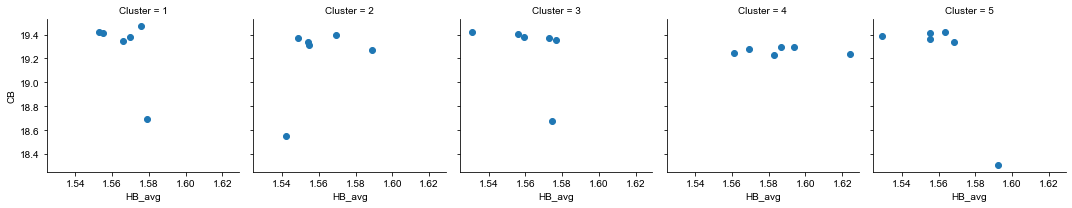

In [29]:
g = sns.FacetGrid(df_ipa, col="Cluster")

g = g.map(plt.scatter, "HB_avg", "CB")

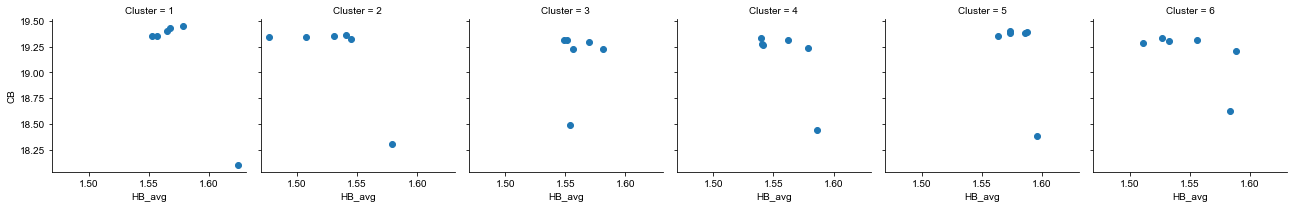

In [30]:
h = sns.FacetGrid(df_noipa, col="Cluster")

h = h.map(plt.scatter, "HB_avg", "CB")

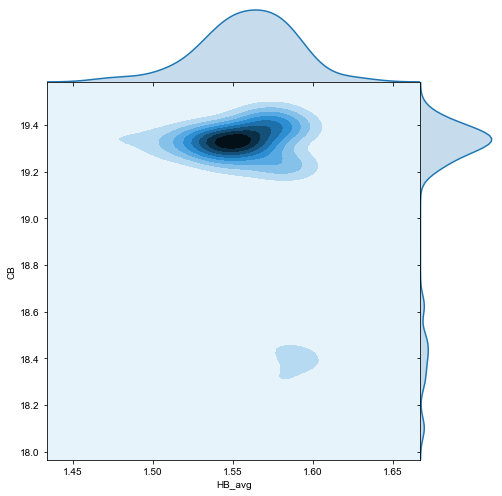

In [31]:
x1=df_noipa["HB_avg"]
x2=df_noipa["CB"]
g = sns.jointplot(x1, x2, kind="kde", height=7, space=0)

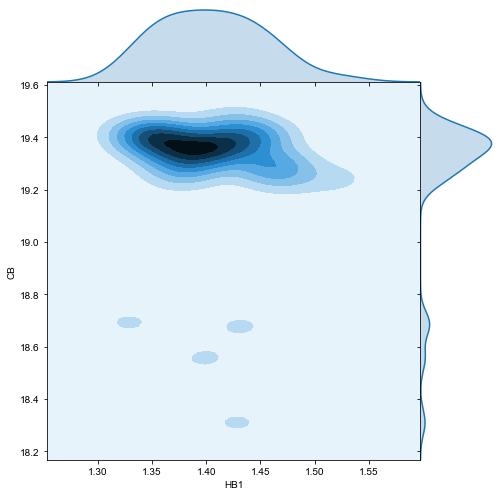

In [32]:
x1=df_ipa["HB1"]
x2=df_ipa["CB"]
g = sns.jointplot(x1, x2, kind="kde", height=7, space=0)

In [40]:
clust_num=[]
res_num=[]
CB=[]
HB=[]

resid=[14,46,78,110,142,174]

files_ipa = sorted(glob("./NMR/1-With_IPA/*.pdb.cs"))
print(files_ipa)

for f in files_ipa:
    inputfile = open(f, 'r')
    
    for line in inputfile:
        for res in resid:
            if "{},A,CB".format(res) in line:
                line = line.strip()
                lineSplit = line.split(",")
                CB.append(lineSplit[3])
                CB.append(lineSplit[3])
                CB.append(lineSplit[3])
                clust_num.append(f[-16])
                clust_num.append(f[-16])
                clust_num.append(f[-16])
                res_num.append(res)
                res_num.append(res)
                res_num.append(res)

            if "{},A,HB".format(res) in line:
                line = line.strip()
                lineSplit = line.split(",")
                HB.append(lineSplit[3])         


df_tmp0=pd.Series(clust_num).astype(int)
df_tmp1=pd.Series(res_num).astype(int)
df_tmp2=pd.Series(CB).astype(float)
df_tmp3=pd.Series(HB).astype(float)


all_dfs = [df_tmp0,df_tmp1, df_tmp2, df_tmp3]

df2_ipa = pd.concat(all_dfs, axis=1)
 
df2_ipa.columns = ['Cluster', 'Residue', 'CB', 'HB']

df2_ipa

['./NMR/1-With_IPA/pcca1_samples.pdb.cs', './NMR/1-With_IPA/pcca2_samples.pdb.cs', './NMR/1-With_IPA/pcca3_samples.pdb.cs', './NMR/1-With_IPA/pcca4_samples.pdb.cs', './NMR/1-With_IPA/pcca5_samples.pdb.cs']


,Cluster,Residue,CB,HB
0,1,14,18.6929,1.3287
1,1,14,18.6929,1.8493
2,1,14,18.6929,1.5587
3,1,46,19.4224,1.3540
4,1,46,19.4224,1.7701
...,...,...,...,...
85,5,142,19.4156,1.7400
86,5,142,19.4156,1.5004
87,5,174,19.3839,1.3547
88,5,174,19.3839,1.7325


In [41]:
clust_num=[]
res_num=[]
CB=[]
HB=[]

resid=[14,46,78,110,142,174]

files_noipa = sorted(glob("./NMR/2-Without_IPA/*.pdb.cs"))
print(files_noipa)

for f in files_noipa:
    inputfile = open(f, 'r')
    
    for line in inputfile:
        for res in resid:
            if "{},A,CB".format(res) in line:
                line = line.strip()
                lineSplit = line.split(",")
                CB.append(lineSplit[3])
                CB.append(lineSplit[3])
                CB.append(lineSplit[3])
                clust_num.append(f[-16])
                clust_num.append(f[-16])
                clust_num.append(f[-16])
                res_num.append(res)
                res_num.append(res)
                res_num.append(res)

            if "{},A,HB".format(res) in line:
                line = line.strip()
                lineSplit = line.split(",")
                HB.append(lineSplit[3])         


df_tmp0=pd.Series(clust_num).astype(int)
df_tmp1=pd.Series(res_num).astype(int)
df_tmp2=pd.Series(CB).astype(float)
df_tmp3=pd.Series(HB).astype(float)


all_dfs = [df_tmp0,df_tmp1, df_tmp2, df_tmp3]

df2_noipa = pd.concat(all_dfs, axis=1)
 
df2_noipa.columns = ['Cluster', 'Residue', 'CB', 'HB']

df2_noipa

['./NMR/2-Without_IPA/pcca1_samples.pdb.cs', './NMR/2-Without_IPA/pcca2_samples.pdb.cs', './NMR/2-Without_IPA/pcca3_samples.pdb.cs', './NMR/2-Without_IPA/pcca4_samples.pdb.cs', './NMR/2-Without_IPA/pcca5_samples.pdb.cs', './NMR/2-Without_IPA/pcca6_samples.pdb.cs']


,Cluster,Residue,CB,HB
0,1,14,18.1009,1.4390
1,1,14,18.1009,1.8923
2,1,14,18.1009,1.5399
3,1,46,19.4348,1.4551
4,1,46,19.4348,1.7217
...,...,...,...,...
103,6,142,19.2127,1.7665
104,6,142,19.2127,1.5800
105,6,174,19.3402,1.4173
106,6,174,19.3402,1.7147


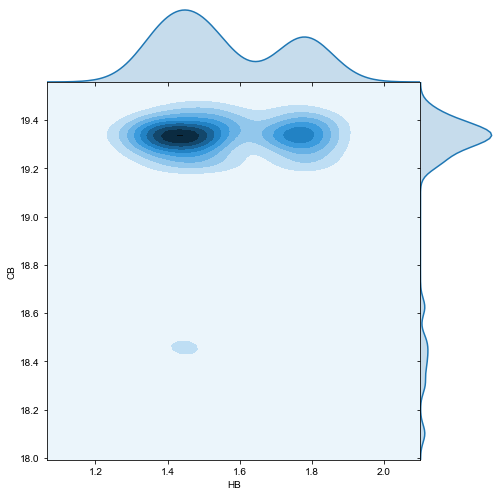

In [42]:
x1=df2_noipa["HB"]
x2=df2_noipa["CB"]
g = sns.jointplot(x1, x2, kind="kde", height=7, space=0)

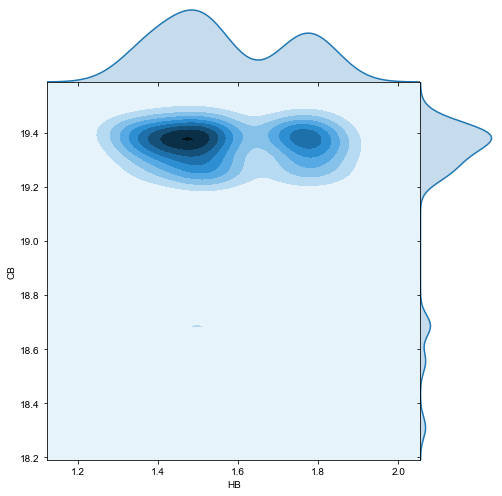

In [43]:
x1=df2_ipa["HB"]
x2=df2_ipa["CB"]
g = sns.jointplot(x1, x2, kind="kde", height=7, space=0)

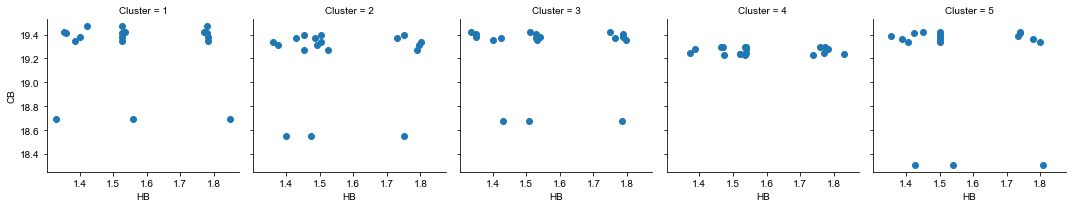

In [45]:
g = sns.FacetGrid(df2_ipa, col="Cluster")

g = g.map(plt.scatter, "HB", "CB")

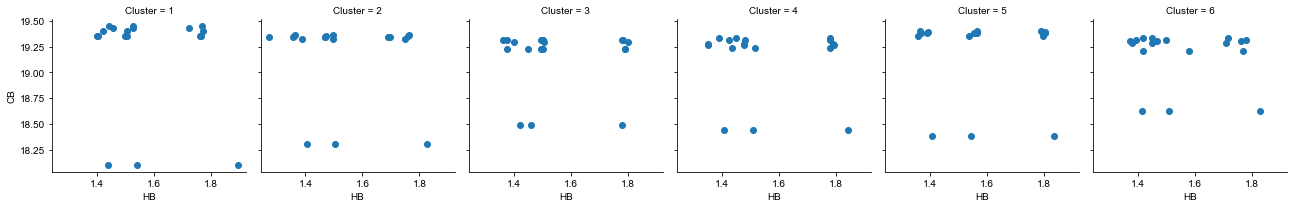

In [46]:
h = sns.FacetGrid(df2_noipa, col="Cluster")

h = h.map(plt.scatter, "HB", "CB")

In [ ]:
clust_num=[]
res_num=[]
CB=[]
HB=[]

resid=[14,46,78,110,142,174]

files_ipa = sorted(glob("./NMR/1-With_IPA/*.pdb.cs"))
print(files_ipa)

for f in files_ipa:
    inputfile = open(f, 'r')
    
    for line in inputfile:
        for res in resid:
            if "{},A,CB".format(res) in line:
                line = line.strip()
                lineSplit = line.split(",")
                CB.append(lineSplit[3])
                CB.append(lineSplit[3])
                CB.append(lineSplit[3])
                clust_num.append(f[-16])
                clust_num.append(f[-16])
                clust_num.append(f[-16])
                res_num.append(res)
                res_num.append(res)
                res_num.append(res)

            if "{},A,HB".format(res) in line:
                line = line.strip()
                lineSplit = line.split(",")
                HB.append(lineSplit[3])         


df_tmp0=pd.Series(clust_num).astype(int)
df_tmp1=pd.Series(res_num).astype(int)
df_tmp2=pd.Series(CB).astype(float)
df_tmp3=pd.Series(HB).astype(float)


all_dfs = [df_tmp0,df_tmp1, df_tmp2, df_tmp3]

df2_ipa = pd.concat(all_dfs, axis=1)
 
df2_ipa.columns = ['Cluster', 'Residue', 'CB', 'HB']

df2_ipa